<a href="https://colab.research.google.com/github/Iamnyatichi/Intro-to-GIS-Programming/blob/main/Intro_to_GIS_lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_04.ipynb)

This lab will help you solidify your understanding of working with `NumPy`, `Pandas`, and `GeoPandas` for geospatial data analysis. Through these exercises, you will perform data manipulation, spatial analysis, and visualizations by combining these powerful libraries.

## Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [126]:
import numpy as np
locations=np.array([[35.6895,139.6917],[40.7128,-74.0060], [51.5074,-0.1278],[48.8566,2.3522]])

#Convert the latitude and longitude values from degrees to radians using np.radians().
locations_radians=np.radians(locations)
print(f"Coordinates in Radians: \n {locations}")

Coordinates in Radians: 
 [[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]


In [127]:
# Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.
tokyo_newyork= locations_radians[1]-locations_radians[0]
print(f"Difference between Tokyo to New York: {tokyo_newyork}")

tokyo_london=locations_radians[2]-locations_radians[0]
print(f"Difference between Tokyo to London: {tokyo_london}")

tokyo_paris= locations_radians[3]-locations_radians[0]
print(f"Difference between Tokyo to Paris: {tokyo_paris}")


Difference between Tokyo to New York: [ 0.08767312 -3.72972847]
Difference between Tokyo to London: [ 0.27607444 -2.44031063]
Difference between Tokyo to Paris: [ 0.22980925 -2.39702647]


In [128]:
# Testing
math_values= np. array([[10, 20,30], [40,50,60], [70,80,90], [100,110,120]])
print(f"The Math Values are:\n {math_values}")

# Substraction test
nairobi= math_values[1]- math_values[0]
print(f"The Differences are: \n {nairobi}")
kisii= math_values[2]- math_values[0]
print(kisii)
kenya= math_values[3]- math_values[0]
print(kenya)

The Math Values are:
 [[ 10  20  30]
 [ 40  50  60]
 [ 70  80  90]
 [100 110 120]]
The Differences are: 
 [30 30 30]
[60 60 60]
[90 90 90]


## Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [129]:
import pandas as pd
url= "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
world_cities= pd.read_csv(url)
world_cities.head()


,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [130]:
# Filtering
world_citiesfiltered= world_cities[world_cities["population"]>1000000]
world_citiesfiltered

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [131]:
# Group the cities by their country and calculate the total population for each country.
world_citiesgrouped= world_cities.groupby("country")["population"].sum()
world_citiesgrouped

,population
country,
AFG,4931702
AGO,6821544
ALB,895350
ALD,10682
AND,53998
...,...
WSM,61916
YEM,3759000
ZAF,13373789


In [132]:
#Sort the cities by population in descending order and display the top 10 cities.
world_citiessorted= world_cities.groupby("name")["population"].sum().sort_values(ascending=False)
world_citiessorted.head(10)

,population
name,
Tokyo,35676000
New York,19040000
Mexico City,19028000
Mumbai,18978000
Sao Paulo,18845000
Delhi,15926000
Shanghai,14987000
Kolkata,14787000
Dhaka,12797394


## Exercise 3: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [133]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the New York City building dataset from the GeoJSON file using GeoPandas:
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
new_york= gpd.read_file(url)
new_york.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


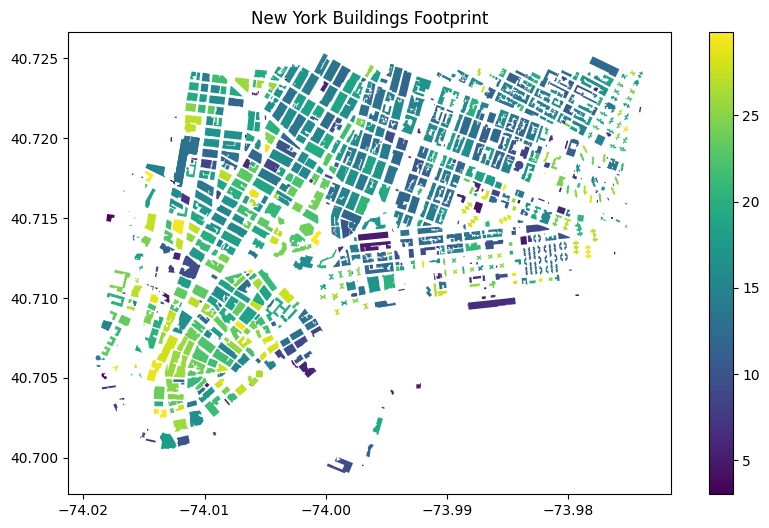

In [134]:
# Create a plot of the building footprints and color them based on the building height (use the height_MS column)
new_york.plot("height_MS", figsize= (10,6), legend= True)
plt.title("New York Buildings Footprint")
plt.show()

In [135]:
pip install mapclassify

In [136]:
# Create an interactive map of the building footprints and color them based on the building height (use the height_MS column).
new_york.explore("height_MS", legend= True)

In [137]:
# Calculate the average building height (use the height_MS column).
average_height= new_york["height_MS"].mean()
average_height

15.454691136974038

In [138]:
# Select buildings with a height greater than the average height.
height_greater= new_york[new_york["height_MS"]> average_height]
height_greater

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
1196,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
1198,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
1199,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
1200,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."


In [139]:
# Save the GeoDataFrame to a new GeoJSON file
new_york.to_file("nyc_heights.geojson")

## Exercise 4: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [140]:
#Use Pandas to load the world cities dataset from this UR
url_1= "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
worldy_cities= pd.read_csv(url_1)
worldy_cities.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [141]:
# Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
cities_filtered= worldy_cities[worldy_cities["latitude"].between (-40,60)]
cities_filtered

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [142]:
# Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
df= pd.DataFrame(cities_filtered)
cities_filtered_gpd= gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
cities_filtered_gpd

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.22502 -22.92502)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.62502 -23.55868)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.18518 -33.92001)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.85582 1.29303)


In [143]:
# Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
print(cities_filtered_gpd.crs)
projection=cities_filtered_gpd.set_crs(epsg=3857, inplace=True)
projection

None


,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.533 0.583)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.225 -22.925)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.625 -23.559)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.185 -33.92)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.856 1.293)


In [144]:
print(cities_filtered_gpd.crs)

EPSG:3857


In [145]:
#Calculate the distance (in meters) between each city and the city of Paris.
cities_filtered_gpd["centroid"]=cities_filtered_gpd.centroid
cities_filtered_gpd["centroid"]




,centroid
0,POINT (32.533 0.583)
1,POINT (30.275 0.671)
2,POINT (15.799 40.642)
3,POINT (14.656 41.563)
4,POINT (7.315 45.737)
...,...
1244,POINT (-43.225 -22.925)
1245,POINT (-46.625 -23.559)
1246,POINT (151.185 -33.92)
1247,POINT (103.856 1.293)


In [146]:
cities_filtered_gpd= cities_filtered_gpd.set_index("name")


In [147]:
cities_filtered_gpd

,id,country,latitude,longitude,population,geometry,centroid
name,,,,,,,
Bombo,1,UGA,0.58330,32.53330,75000,POINT (32.533 0.583),POINT (32.533 0.583)
Fort Portal,2,UGA,0.67100,30.27500,42670,POINT (30.275 0.671),POINT (30.275 0.671)
Potenza,3,ITA,40.64200,15.79900,69060,POINT (15.799 40.642),POINT (15.799 40.642)
Campobasso,4,ITA,41.56300,14.65600,50762,POINT (14.656 41.563),POINT (14.656 41.563)
Aosta,5,ITA,45.73700,7.31500,34062,POINT (7.315 45.737),POINT (7.315 45.737)
...,...,...,...,...,...,...,...
Rio de Janeiro,1245,BRA,-22.92502,-43.22502,11748000,POINT (-43.225 -22.925),POINT (-43.225 -22.925)
Sao Paulo,1246,BRA,-23.55868,-46.62502,18845000,POINT (-46.625 -23.559),POINT (-46.625 -23.559)
Sydney,1247,AUS,-33.92001,151.18518,4630000,POINT (151.185 -33.92),POINT (151.185 -33.92)


In [148]:
# select a locatioon paris
paris_centroid=cities_filtered_gpd.loc["Paris", "centroid"]

# calculate distance
cities_filtered_gpd["distance_to_paris"]= cities_filtered_gpd["centroid"].distance(paris_centroid)
cities_filtered_gpd[['centroid', "distance_to_paris"]]

,centroid,distance_to_paris
name,,
Bombo,POINT (32.533 0.583),56.950183
Fort Portal,POINT (30.275 0.671),55.709612
Potenza,POINT (15.799 40.642),15.778768
Campobasso,POINT (14.656 41.563),14.324519
Aosta,POINT (7.315 45.737),5.883188
...,...,...
Rio de Janeiro,POINT (-43.225 -22.925),85.027136
Sao Paulo,POINT (-46.625 -23.559),87.420565
Sydney,POINT (151.185 -33.92),170.324713


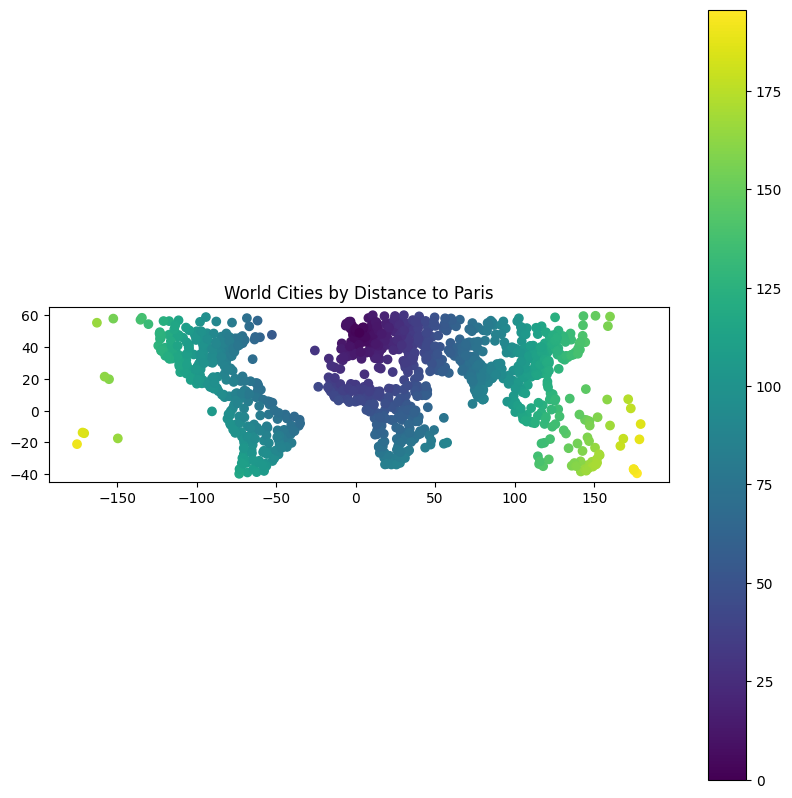

In [149]:
# Plot the cities on a world map, coloring the points by their distance from Paris.
cities_filtered_gpd.plot("distance_to_paris", legend=True, figsize=(10,10))
plt.title("World Cities by Distance to Paris")
plt.show()
